In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os, sys

In [3]:
sys.path.append('..')

In [4]:
from ers.base import ERS
from ers.models import StoVol

In [5]:
T = 25
alpha=0.95
beta=0.7
sv=0.3
d=1

stovol = StoVol(dimension=d, alpha=alpha, beta=beta, sv=sv)

In [6]:
xtrue=np.zeros((T, d));
xtrue[0,:]=stovol.ss*np.random.randn(d)

y=np.zeros((T, d))
y[0]=beta*np.exp(xtrue[0,0]/2)*np.random.randn(d);
for t in np.arange(1,T):
    xtrue[t]=alpha*xtrue[t-1]+sv*np.random.randn(d)
    y[t]=beta*np.exp(xtrue[t]/2)*np.random.randn(d)

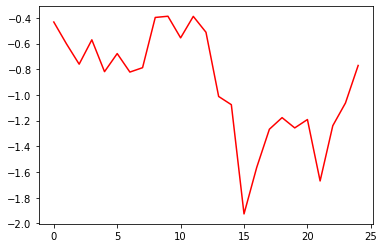

In [7]:
plt.plot(xtrue, color = 'red')

In [8]:
n_samples = 2
accepted_x, cand_x, n_trial = stovol.sample_n(n_samples=n_samples, n_particles=2500, T=T, y=y)

 50%|█████     | 1/2 [00:09<00:09,  9.41s/it]

0


100%|██████████| 2/2 [00:14<00:00,  7.08s/it]

1


In [9]:
n_samples/ n_trial

0.6666666666666666

In [10]:
average_x = np.mean(accepted_x, axis=0)

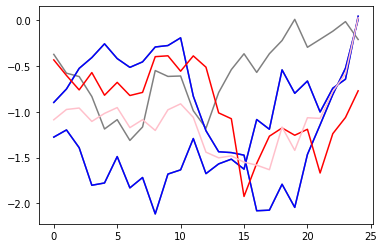

In [11]:
for i in range(cand_x.shape[0]):
    plt.plot(cand_x[i,:,0], color = 'gray')
    
for i in range(accepted_x.shape[0]):
    plt.plot(accepted_x[i,:,0], color = 'blue')

plt.plot(xtrue, color = 'red')
plt.plot(average_x, color = 'pink')

In [12]:
 from pathos.multiprocessing import ProcessingPool as Pool

In [13]:
import time

In [ ]:
start = time.time()
num_workers = 3
n_samples = 100
n_particles = 2000
f = lambda x : stovol.sample_n(n_samples=n_samples, n_particles=n_particles, T=T, y=y)
with Pool(num_workers) as p:
        out = p.map(f, range(num_workers))
time.time()-start

  0%|          | 0/100 [00:00<?, ?it/s]

0


  1%|          | 1/100 [00:12<21:22, 12.96s/it]

0


  1%|          | 1/100 [00:13<22:13, 13.47s/it]

0


  1%|          | 1/100 [00:14<23:59, 14.54s/it]

1


  2%|▏         | 2/100 [00:19<18:23, 11.26s/it]

1


  2%|▏         | 2/100 [00:20<18:29, 11.32s/it]

1


  2%|▏         | 2/100 [00:22<20:30, 12.56s/it]

2


  3%|▎         | 3/100 [00:26<16:12, 10.03s/it]

2


  3%|▎         | 3/100 [00:28<16:30, 10.21s/it]

2


  3%|▎         | 3/100 [00:28<17:17, 10.70s/it]

3


  4%|▍         | 4/100 [00:34<15:02,  9.40s/it]

33



  4%|▍         | 4/100 [00:35<15:17,  9.56s/it]

4


  5%|▌         | 5/100 [00:55<19:41, 12.44s/it]

4
4

  5%|▌         | 5/100 [00:56<20:46, 13.13s/it]

  5%|▌         | 5/100 [00:56<20:27, 12.92s/it]

5


  6%|▌         | 6/100 [01:16<23:47, 15.19s/it]

5


  6%|▌         | 6/100 [01:17<24:04, 15.37s/it]

5


  6%|▌         | 6/100 [01:17<24:19, 15.53s/it]

In [ ]:
accepted_x = np.concatenate([out[i][0] for i in range(num_workers)])
cand_x = np.concatenate([out[i][1] for i in range(num_workers)])
average_x = np.mean(accepted_x, axis=0)

In [ ]:
for i in range(cand_x.shape[0]):
    plt.plot(cand_x[i,:,0], color = 'gray')
    
for i in range(accepted_x.shape[0]):
    plt.plot(accepted_x[i,:,0], color = 'blue')

plt.plot(xtrue, color = 'red')
plt.plot(average_x, color = 'pink')